## Breast Cancer Diagnostic

Breast cancer originates in breast tissue. It occurs when breast cells mutate and grow out of control, creating a mass of tissue (tumor). Like other cancers, breast cancer can invade and grow into the tissue surrounding your breast. It can also travel to other parts of your body and form new tumors. When this happens, it’s called metastasis. 
Breast cancer stages range from 0 to IV with 0 indicating cancer that is noninvasive or contained within the milk ducts. Stage IV breast cancer, also called metastatic breast cancer, indicates cancer that has spread to other areas of the body.

### Context
There are two types of breast cancer tumors: those that are non-cancerous, or ‘benign’, and those that are cancerous, which are ‘malignant’.

**Benign:** Tumors diagnosed as benign, are not generally aggressive toward surrounding tissue, occasionally they may continue to grow, pressing on other tissue and causing pain or other problems. In these situations, the tumor is removed, allowing pain or complications to subside.

**Malignant:** These tumors are cancerous and may be aggressive because they invade and damage surrounding tissue. When a tumor is suspected to be malignant, the doctor will perform a biopsy to determine the severity or aggressiveness of the tumor.


Commonly, texture and morphological features of breast ultrasound images are used to analyze the benign and malignant of tumors. A straightforward approach is to train classifiers based on texture and morphological features by a computer for classifying benign and malignant tumors automatically to overcome the subjectivity of manually ultrasound image analysis.



#### Objective
Predict whether the cancer is benign or malignant

### Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter) 
2) texture (standard deviation of gray-scale values) 
3) perimeter 
4) area 
5) smoothness (local variation in radius lengths) 
6) compactness (perimeter^2 / area - 1.0) 
7) concavity (severity of concave portions of the contour) 
8) concave points (number of concave portions of the contour) 
9) symmetry 
10) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
All feature values are recoded with four significant digits.

### Content
1) Understanding the data
2) Statiscal Annalysis and Visualization

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Understanding the data

In [2]:
#load dataset

data=pd.read_csv('/Users/apple/Downloads/data.csv')

In [3]:
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#columns in the dataset
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### Insights from dataframe 

From the dataframe above;

1) The 'diagnosis' column is the target label (M='Malignant', B='Benign')
2) The  'Id' column cannot be used for classification.
3) The 'Unamed;32' column is invalid.


In [5]:
#drop the invalid columns ('id', 'Unnamed: 32')

data=data.drop(['id', 'Unnamed: 32'], axis=1)

display(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Number of Benign:  357
Number of Malignant :  212


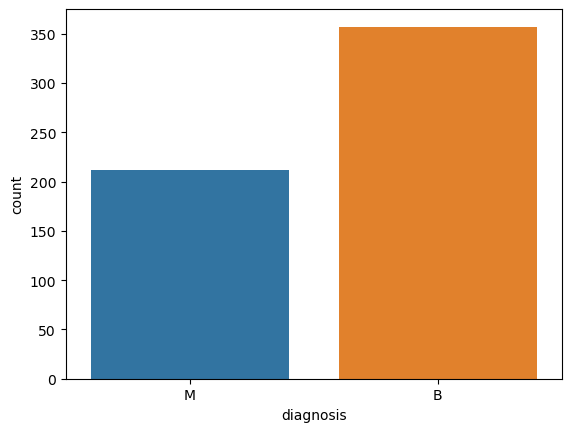

In [7]:
#value count for the dianosis column
sns.countplot(x=data.diagnosis,label="Count")       # M = 212, B = 357
B, M = data.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

#### Statiscal Analysis



In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Insights**

Large difference in range of values between features of the data.

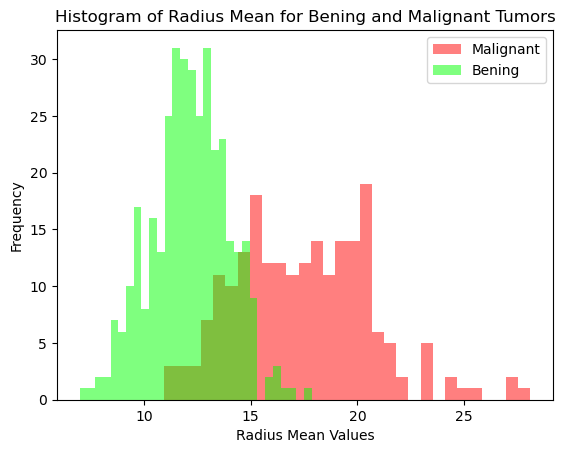

Most frequent malignant radius mean is:  20.101999999999997


In [9]:
#distribution of target variale(diagnosis= M, B)with one of the features, 'radius_mean'
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)


**Insights**
1) From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
2) The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)
3) From the graph we can conclude that if the radius mean of a tumor is 20.102, then it's a malignant tumor...


In [10]:
#removed the target column from the features

X=data.drop(['diagnosis'], axis=1)      
y=data['diagnosis']

#standardization of feature values

X_scaled=(X - X.mean()) / (X.std())      #differences between values of features are very high
display(X_scaled)
display(y)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

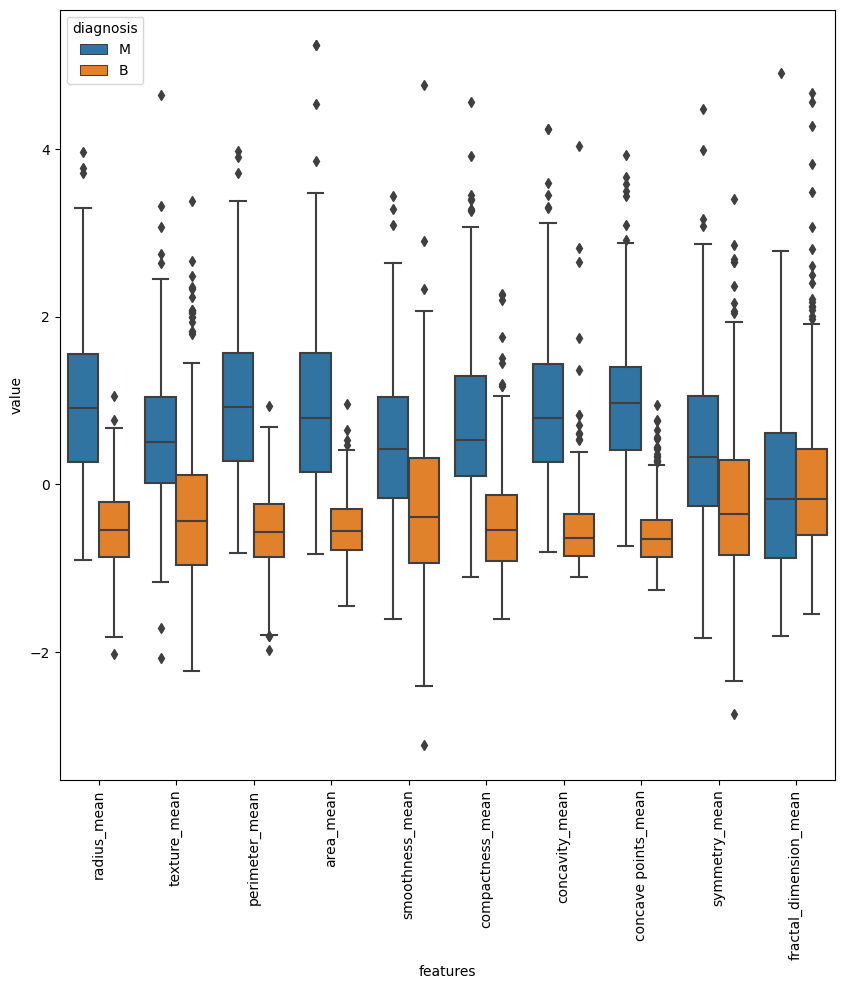

In [11]:
#detecting outliers using boxplots for the first ten plots
data_scaled = pd.concat([y, X_scaled.iloc[:,0:10]],axis=1)
data_scaled = pd.melt(data_scaled, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_scaled)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

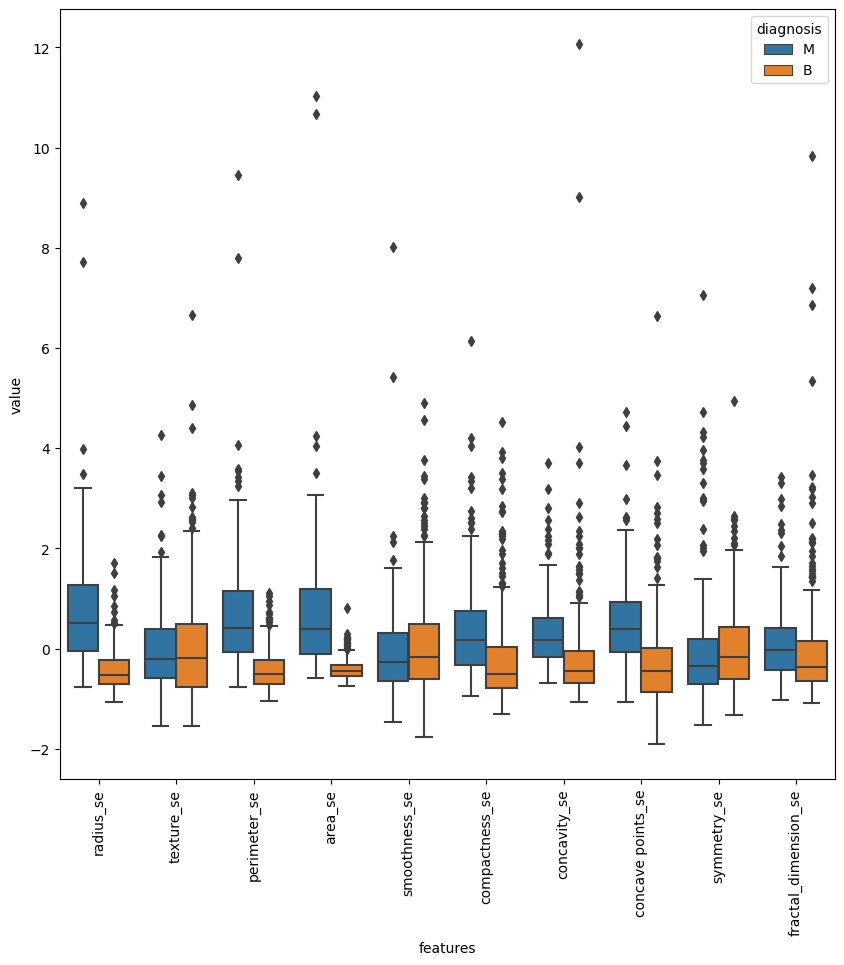

In [12]:
#detecting outliers using boxplots for the second ten plots
data_scaled = pd.concat([y, X_scaled.iloc[:,10:20]],axis=1)
data_scaled = pd.melt(data_scaled, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_scaled)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

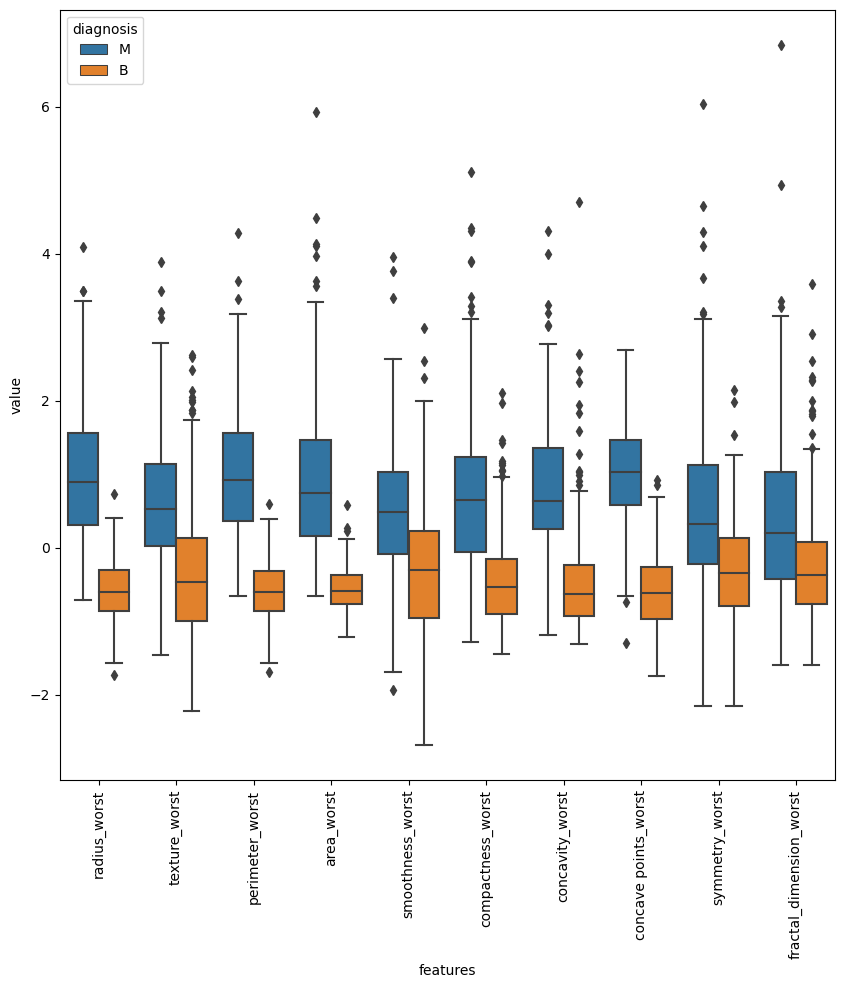

In [13]:
#detecting outliers using boxplots for the third ten plots
data_scaled = pd.concat([y, X_scaled.iloc[:,20:31]],axis=1)
data_scaled = pd.melt(data_scaled, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_scaled)
plt.xticks(rotation=90)


**Insights**

The box plot signifies presence of outliers in the data.
These outliers could be results of rare events or errors. Outliers can have a big impact on your statistical analyses and skew the results of any hypothesis test if they are inaccurate. These extreme values can impact your statistical power as well, making it hard to detect a true effect if there is one.

In [14]:
#convert M,B to 1,0 in the target variable
y_num=y.map(dict(M=1, B=0))

#join target and feature variables together 
df= pd.concat([y_num, X_scaled], axis=1)
display(df)
print(df.shape)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


(569, 31)


In [15]:
from scipy import stats

#removal of outliers
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]
print(df.shape)

(495, 31)


In [25]:
df=df.reset_index()


,level_0,index,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
1,1,2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
2,2,4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
3,3,5,1,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
4,4,6,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,560,0,-0.021933,1.827549,-0.024241,-0.154836,0.208311,0.156383,-0.554182,...,-0.200526,1.219080,-0.210139,-0.305403,-0.362143,-0.177105,-0.669090,-0.149184,-1.051854,-0.040740
491,491,563,1,1.927530,1.348594,2.100128,1.966704,0.962713,2.258148,2.867552,...,1.659509,0.607325,2.137897,1.648205,0.364894,1.044481,1.858420,2.123670,0.045653,0.818557
492,492,564,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
493,493,565,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122


In [27]:
df=df.drop(['index', 'level_0'], axis=1)
display(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
1,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
2,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
3,1,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
4,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,-0.021933,1.827549,-0.024241,-0.154836,0.208311,0.156383,-0.554182,-0.151513,-1.001736,...,-0.200526,1.219080,-0.210139,-0.305403,-0.362143,-0.177105,-0.669090,-0.149184,-1.051854,-0.040740
491,1,1.927530,1.348594,2.100128,1.966704,0.962713,2.258148,2.867552,2.537980,1.230677,...,1.659509,0.607325,2.137897,1.648205,0.364894,1.044481,1.858420,2.123670,0.045653,0.818557
492,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
493,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122


**Insights**

Total of 74 rows removed from the dataframe after removal of outliers 

#### Relationship between Variables

In [28]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741254,0.407111,0.754245,0.745664,0.304018,0.602065,0.752845,0.790748,0.293594,...,0.795813,0.443358,0.801401,0.785407,0.387885,0.583941,0.688232,0.779945,0.383165,0.316421
radius_mean,0.741254,1.000000,0.303868,0.998347,0.992124,0.105271,0.529787,0.725085,0.816742,0.127734,...,0.972976,0.281921,0.967128,0.953473,0.084623,0.458968,0.603564,0.752516,0.176453,0.043659
texture_mean,0.407111,0.303868,1.000000,0.309929,0.309598,-0.022729,0.239106,0.319993,0.281939,0.071375,...,0.332738,0.908867,0.341368,0.331967,0.079620,0.259470,0.303768,0.277020,0.098382,0.111614
perimeter_mean,0.754245,0.998347,0.309929,1.000000,0.990969,0.138133,0.573963,0.757549,0.841477,0.153934,...,0.974861,0.288575,0.973101,0.955845,0.113952,0.497411,0.635056,0.776930,0.196081,0.082954
area_mean,0.745664,0.992124,0.309598,0.990969,1.000000,0.107853,0.522228,0.732061,0.821292,0.134208,...,0.972647,0.283500,0.966550,0.968340,0.094481,0.443513,0.597134,0.742652,0.170612,0.045649
smoothness_mean,0.304018,0.105271,-0.022729,0.138133,0.107853,1.000000,0.632260,0.464609,0.508513,0.516732,...,0.161530,0.027220,0.178895,0.162405,0.793997,0.403701,0.366044,0.446014,0.331749,0.458146
compactness_mean,0.602065,0.529787,0.239106,0.573963,0.522228,0.632260,1.000000,0.867824,0.825167,0.513492,...,0.572608,0.243389,0.617707,0.557655,0.554556,0.868952,0.809259,0.811269,0.448738,0.666189
concavity_mean,0.752845,0.725085,0.319993,0.757549,0.732061,0.464609,0.867824,1.000000,0.938791,0.402377,...,0.754977,0.324770,0.785025,0.751669,0.442173,0.766314,0.897846,0.876544,0.360952,0.484811
concave points_mean,0.790748,0.816742,0.281939,0.841477,0.821292,0.508513,0.825167,0.938791,1.000000,0.399854,...,0.838559,0.285380,0.856292,0.831541,0.436275,0.673878,0.781777,0.910072,0.342620,0.362809
symmetry_mean,0.293594,0.127734,0.071375,0.153934,0.134208,0.516732,0.513492,0.402377,0.399854,1.000000,...,0.167598,0.079910,0.186893,0.168757,0.389893,0.380871,0.325854,0.345336,0.660621,0.342942


<Axes: >

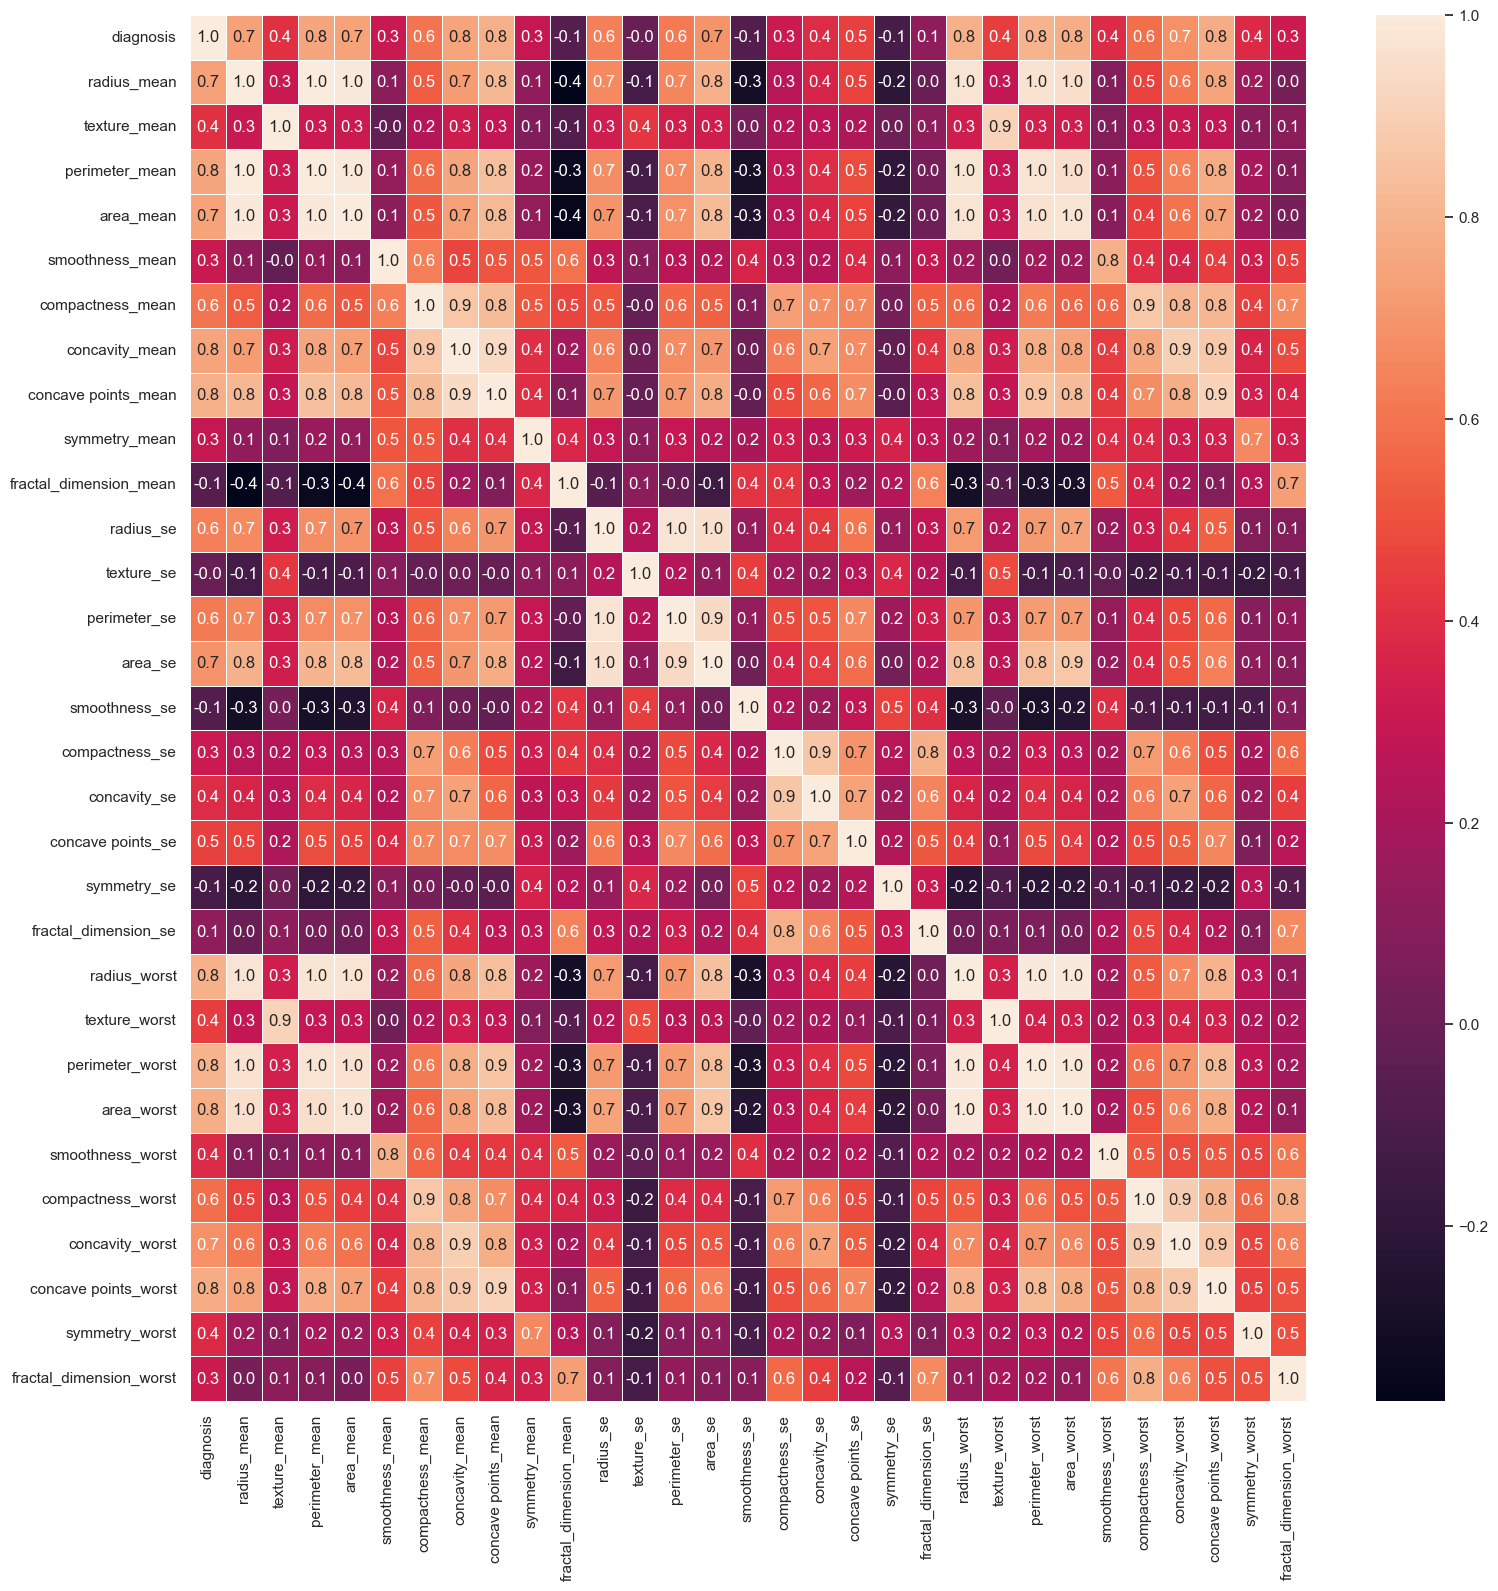

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Insights**

From the heat map above radius_mean, perimeter_mean and area_mean are correlated, there are also negative and no correlation between features in the dataframe. 

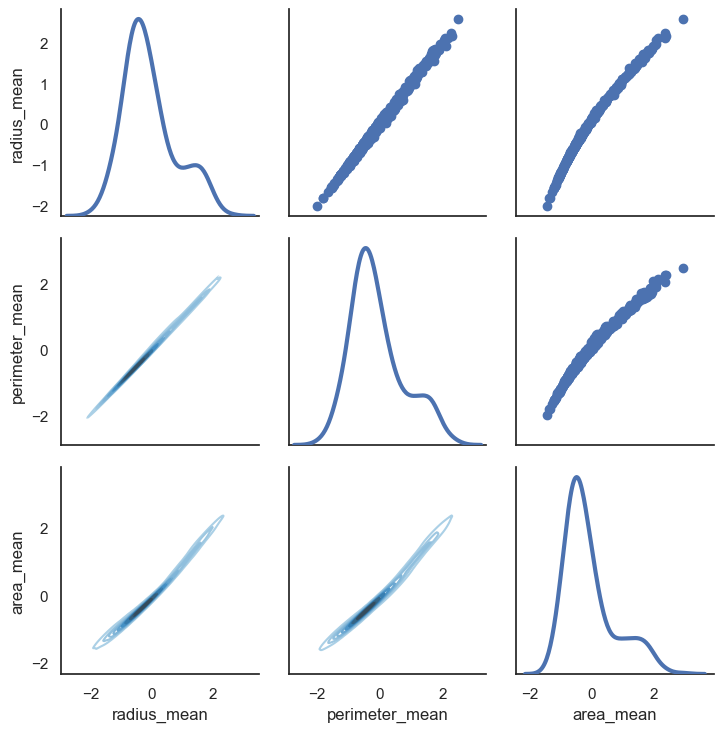

In [30]:
sns.set(style="white")
dfs = df.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sns.PairGrid(dfs, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

To reduce the risk of multicolinearity and improve the accuracy of the machine learning model. Data will undergo feature selection.
**Recursive Feature Elimination** will be used for feature selection

#### Feature Selection

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.metrics import accuracy_score

x=df.drop(['diagnosis'], axis=1)
y=df['diagnosis']

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x.shape)
print(y.shape)


(495, 30)
(495,)


In [78]:
# Recursive Feature Elimination

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rf = RandomForestClassifier() 
rfecv = RFECV(estimator=rf, step=1, min_features_to_select=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


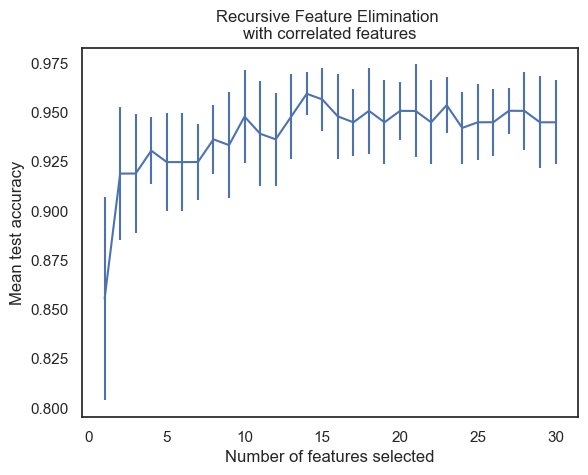

In [77]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
min_features_to_select=1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [79]:
#construct a dataframe with the features selected using RFE
df_1=df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst']]
display(df_1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst
0,1,1.828212,-0.353322,1.684473,1.907030,-0.023825,0.547662,0.741749,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.146620,1.086129
1,1,1.578499,0.455786,1.565126,1.557513,1.362280,2.035440,1.180298,1.510541,-0.023953,1.346291,1.455004,0.526944,0.854222,1.953282
2,1,1.748758,-1.150804,1.775011,1.824624,1.369806,1.427237,1.189310,1.297434,-1.465481,1.337363,1.219651,0.220362,0.612640,0.728618
3,1,-0.475956,-0.834601,-0.386808,-0.505206,0.865540,0.823931,-0.289004,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.262133,0.905091
4,1,1.169878,0.160508,1.137124,1.094332,0.299809,0.646366,0.298365,1.367780,0.322599,1.367122,1.274098,0.518184,0.509104,1.195664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,-0.021933,1.827549,-0.024241,-0.154836,-0.554182,-0.151513,-0.230751,-0.200526,1.219080,-0.210139,-0.305403,-0.362143,-0.669090,-0.149184
491,1,1.927530,1.348594,2.100128,1.966704,2.867552,2.537980,1.724801,1.659509,0.607325,2.137897,1.648205,0.364894,1.858420,2.123670
492,1,2.109139,0.720838,2.058974,2.341795,1.945573,2.318924,2.601897,1.899514,0.117596,1.751022,2.013529,0.378033,0.663928,1.627719
493,1,1.703356,2.083301,1.614511,1.722326,0.692434,1.262558,1.290429,1.535369,2.045599,1.420690,1.493644,-0.690623,0.236365,0.733182


In [80]:
#split data for model
x_1=df_1.drop(['diagnosis'], axis=1)
y_1=df_1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [83]:
X_test.shape

(99, 14)

#### Model


In [86]:
#Building Neural Networks

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def plot_history(history):
    fig, [ax1, ax2]=plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')# epoch means training cycle
    ax1.set_ylabel('Binary crossentrophy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Binary crossentrophy')
    ax2.grid(True)
    
    plt.show()
    
    
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):#lr=learning rate
    
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(14,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='BinaryCrossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


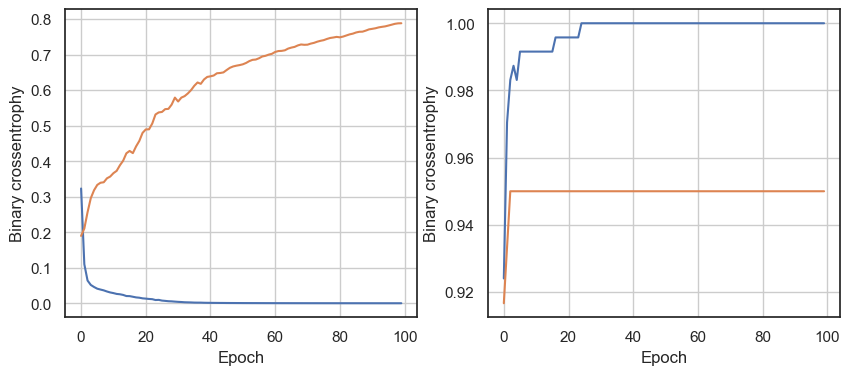

4/4 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.01, batch size 64


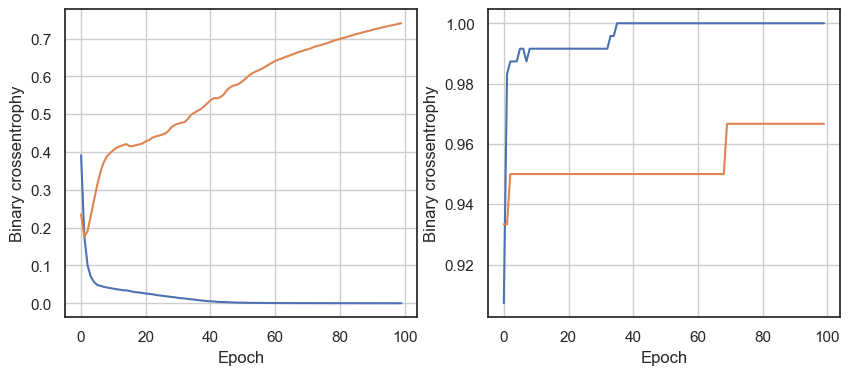

4/4 [==============================] - 0s 5ms/step - loss: 0.1267 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.01, batch size 128


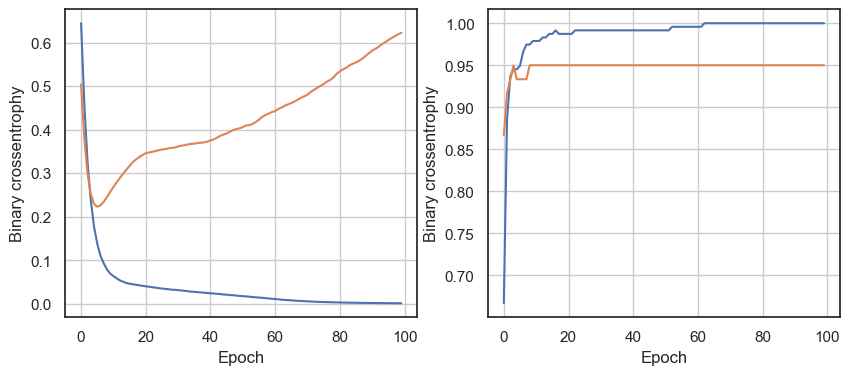

4/4 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.005, batch size 32


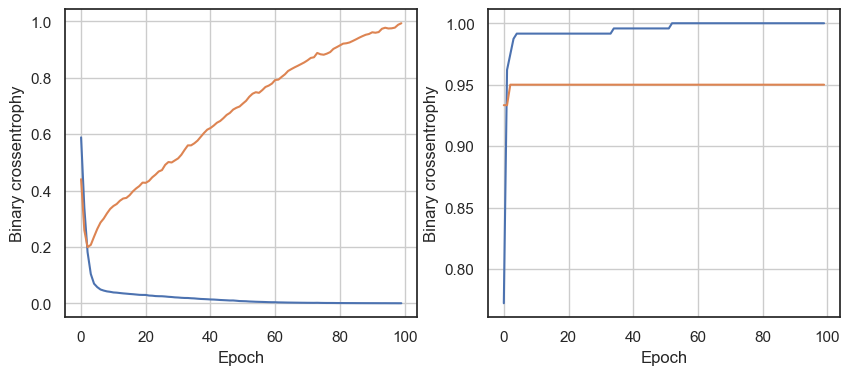

4/4 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.005, batch size 64


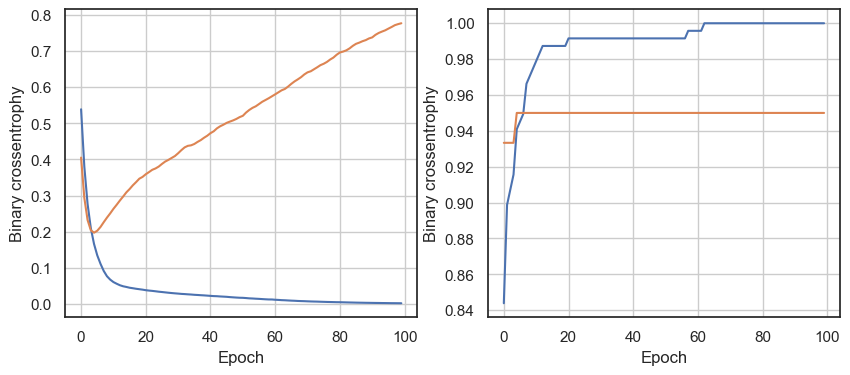

4/4 [==============================] - 0s 4ms/step - loss: 0.0607 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.005, batch size 128


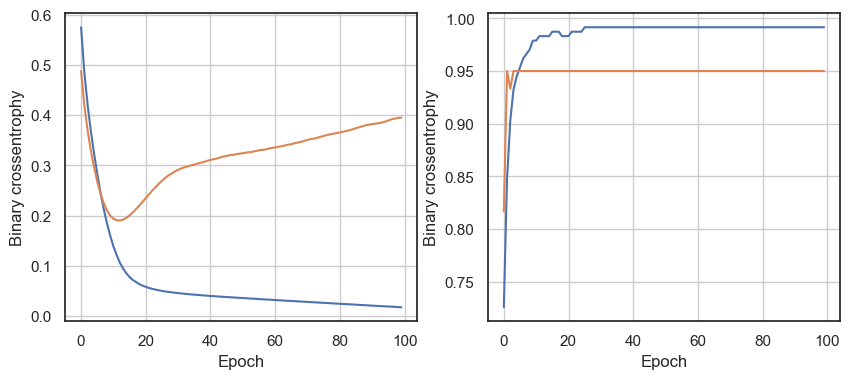

4/4 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.001, batch size 32


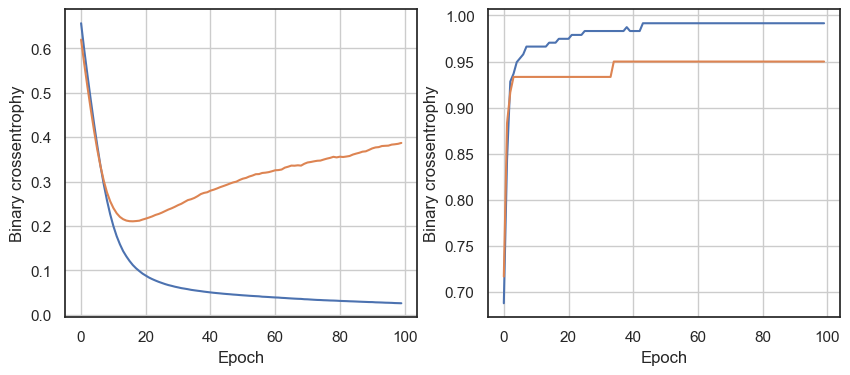

4/4 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.001, batch size 64


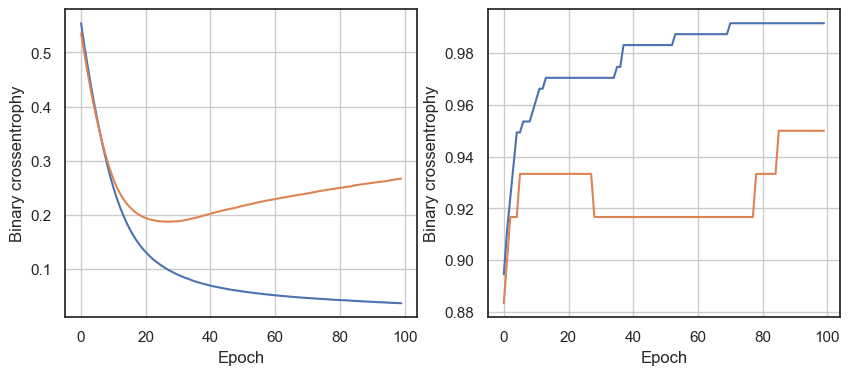

4/4 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9899
16 nodes, dropout 0, lr 0.001, batch size 128


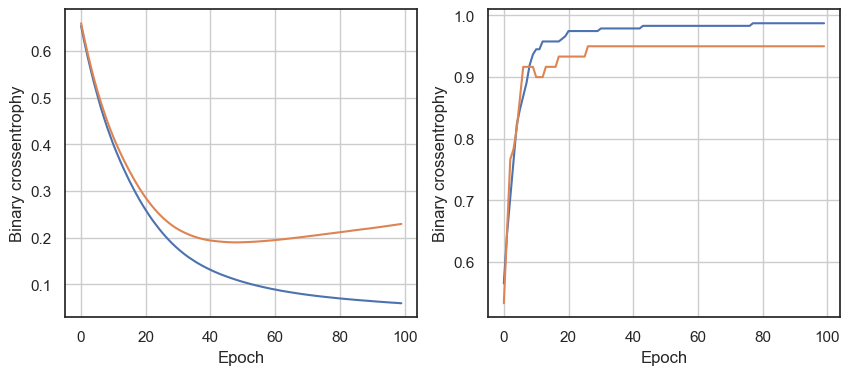

4/4 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9697
16 nodes, dropout 0.2, lr 0.01, batch size 32


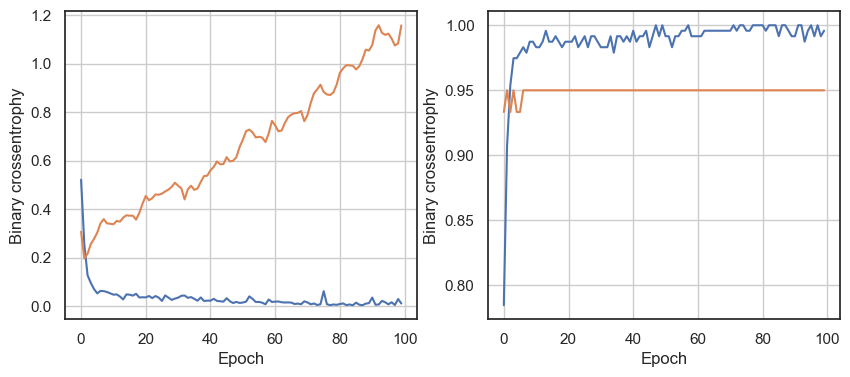

4/4 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.01, batch size 64


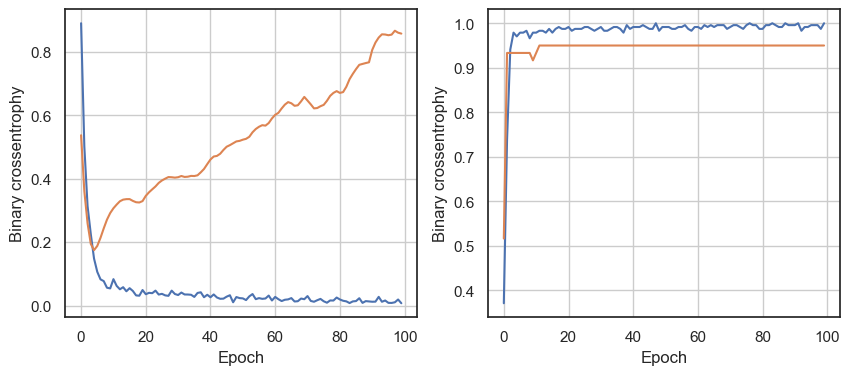

4/4 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.01, batch size 128


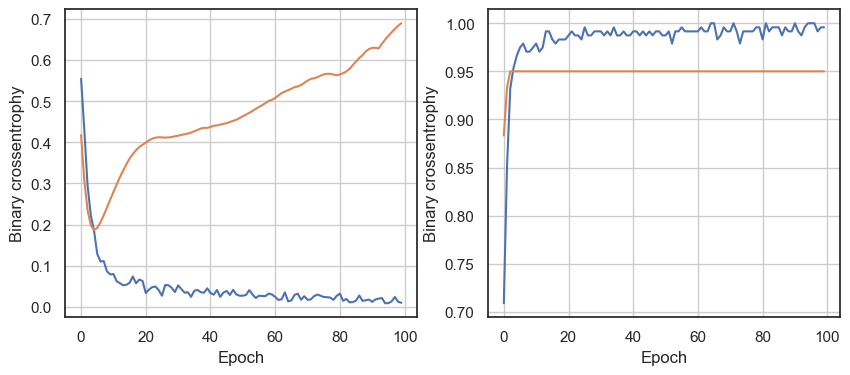

4/4 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.005, batch size 32


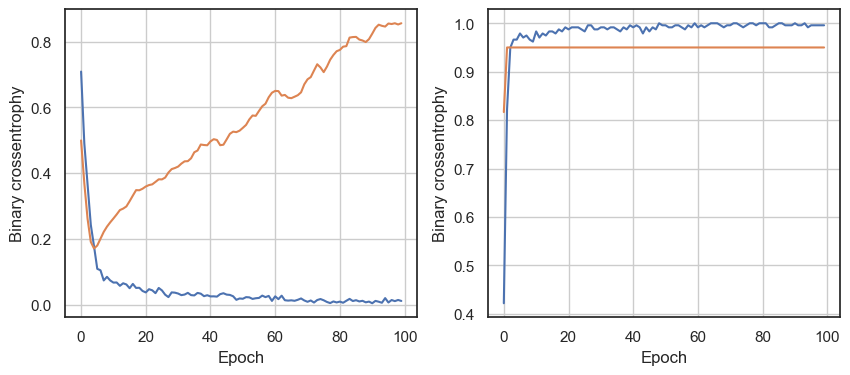

4/4 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.005, batch size 64


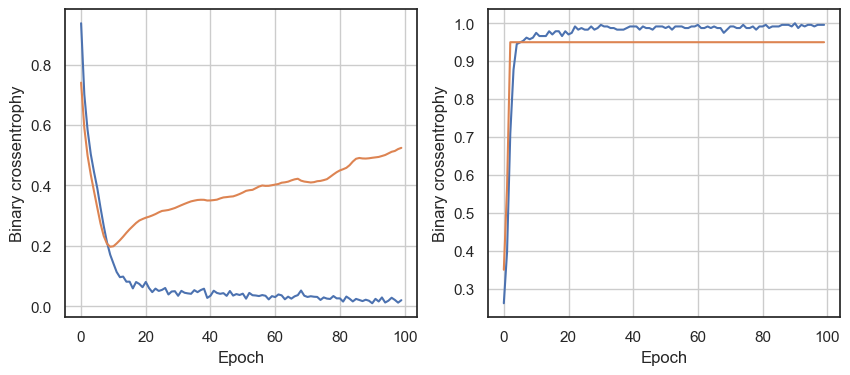

4/4 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.005, batch size 128


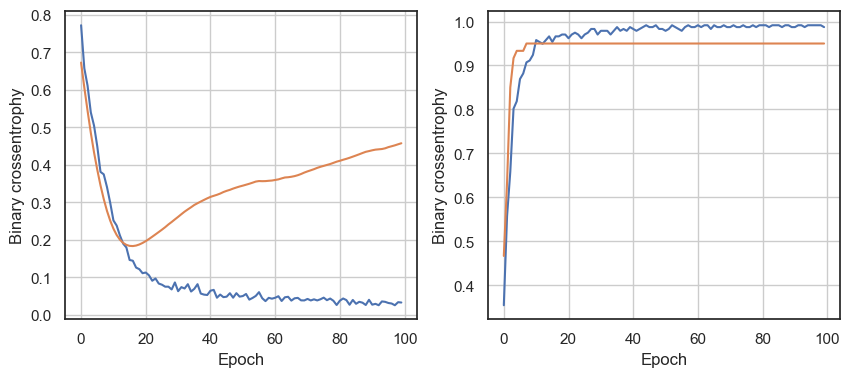

4/4 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.001, batch size 32


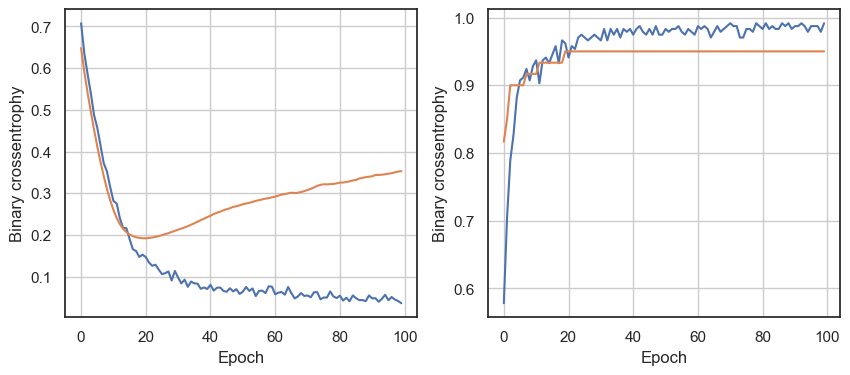

4/4 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.001, batch size 64


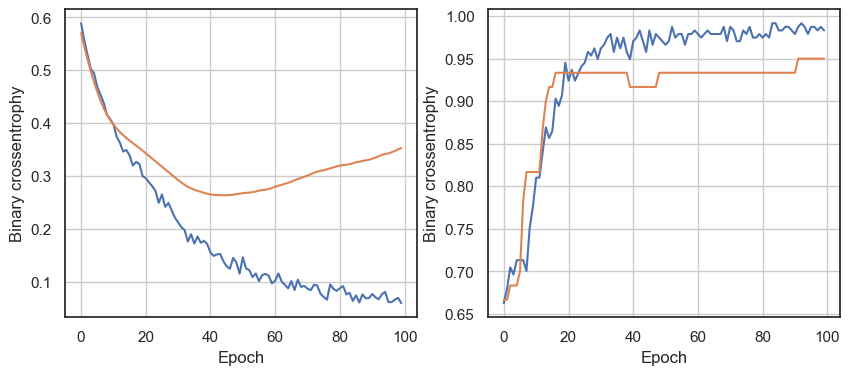

4/4 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9899
16 nodes, dropout 0.2, lr 0.001, batch size 128


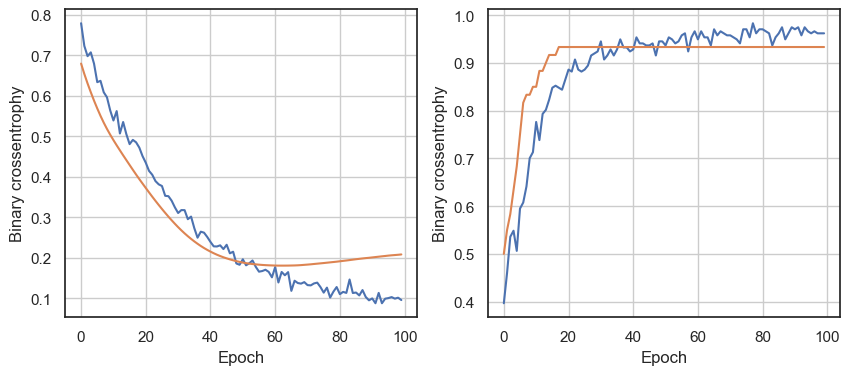

4/4 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9798
32 nodes, dropout 0, lr 0.01, batch size 32


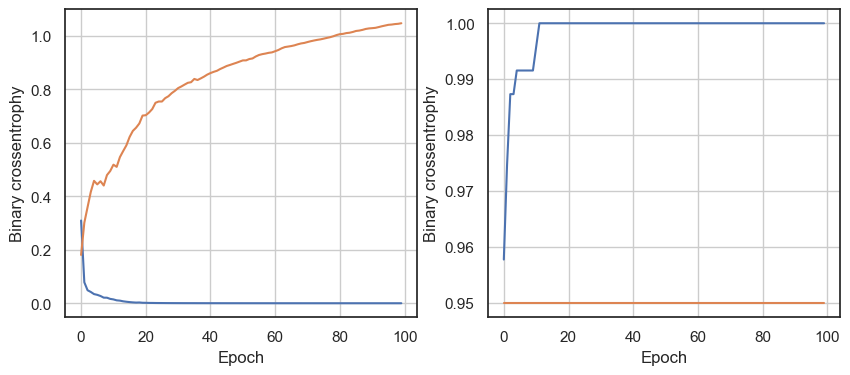

4/4 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.01, batch size 64


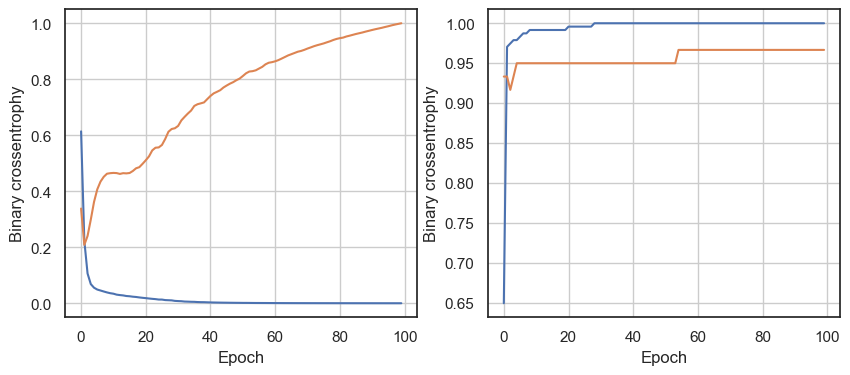

4/4 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.01, batch size 128


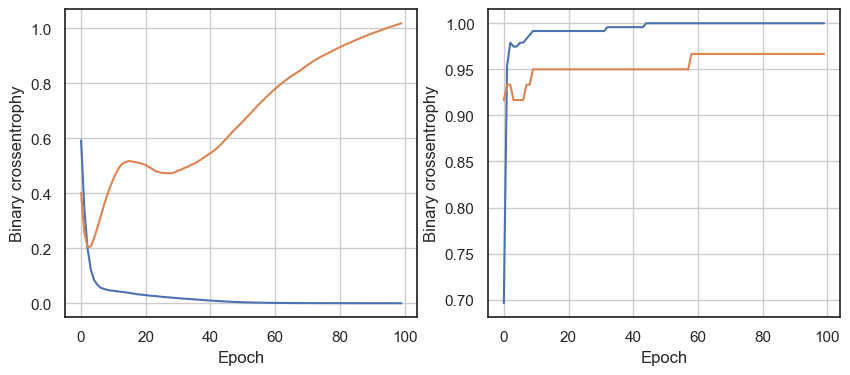

4/4 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.005, batch size 32


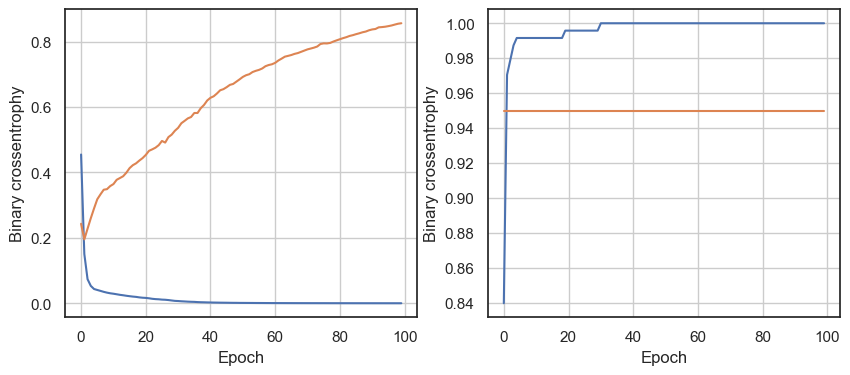

4/4 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.005, batch size 64


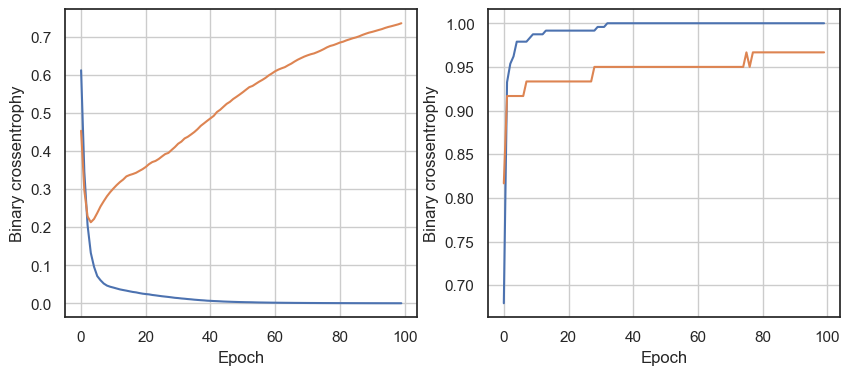

4/4 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.005, batch size 128


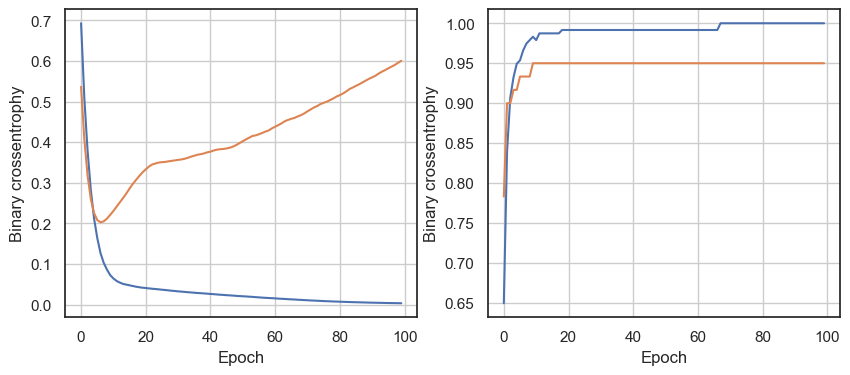

4/4 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.001, batch size 32


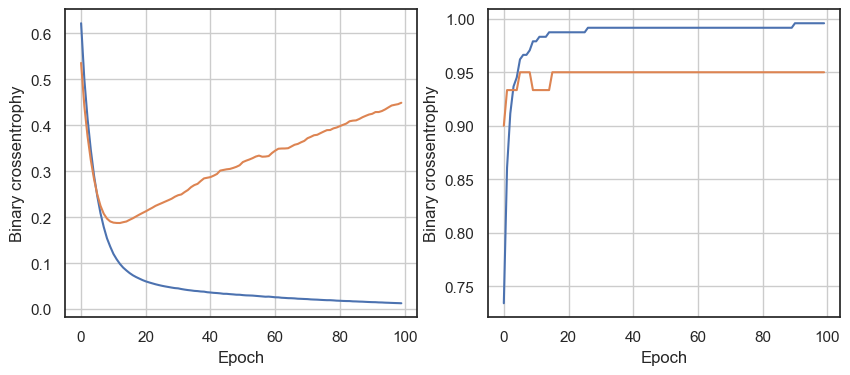

4/4 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.001, batch size 64


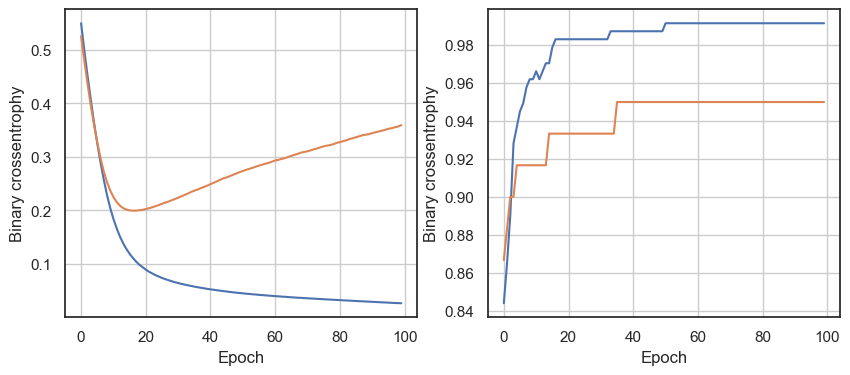

4/4 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9899
32 nodes, dropout 0, lr 0.001, batch size 128


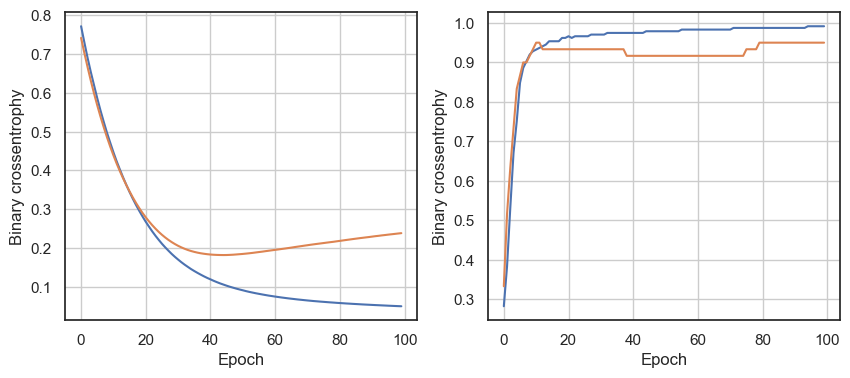

4/4 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.01, batch size 32


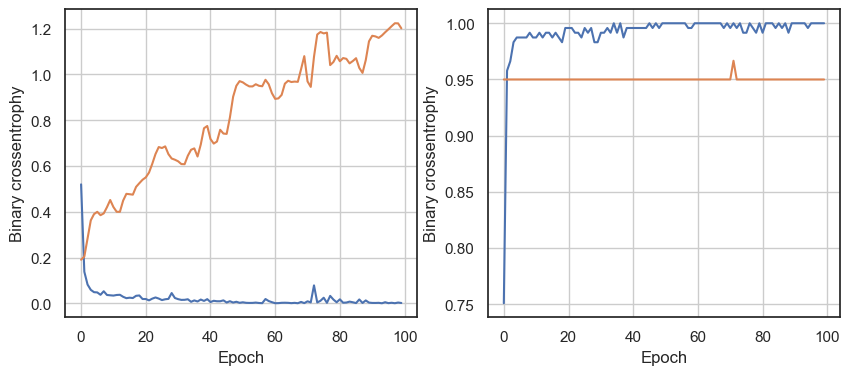

4/4 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.01, batch size 64


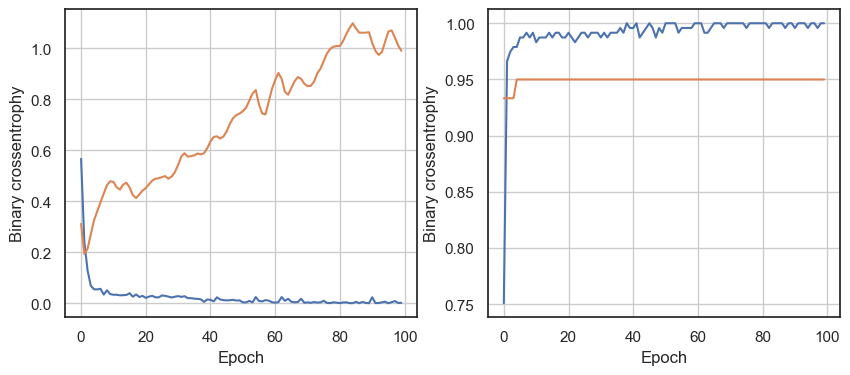

4/4 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.01, batch size 128


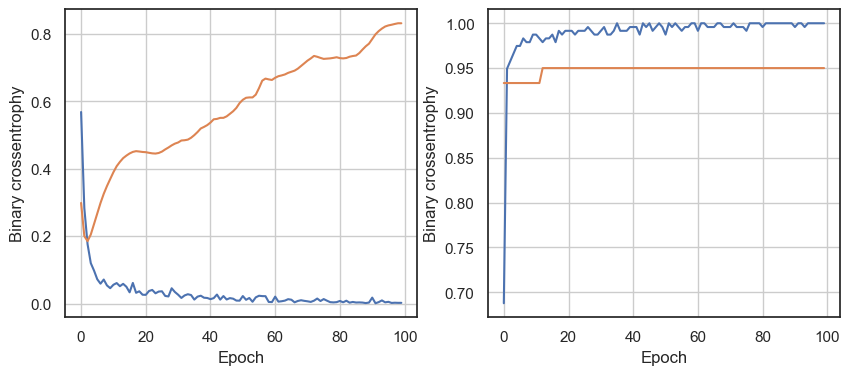

4/4 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.005, batch size 32


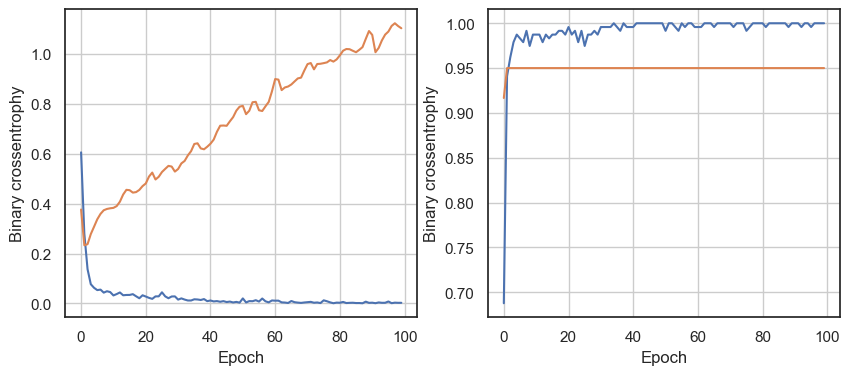

4/4 [==============================] - 0s 5ms/step - loss: 0.0795 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.005, batch size 64


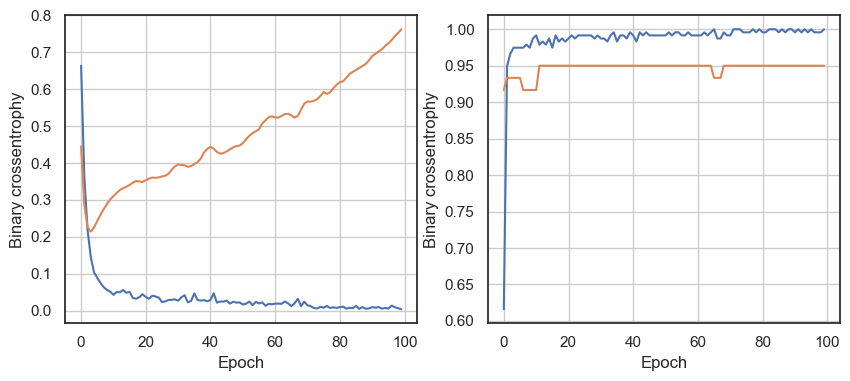

4/4 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.005, batch size 128


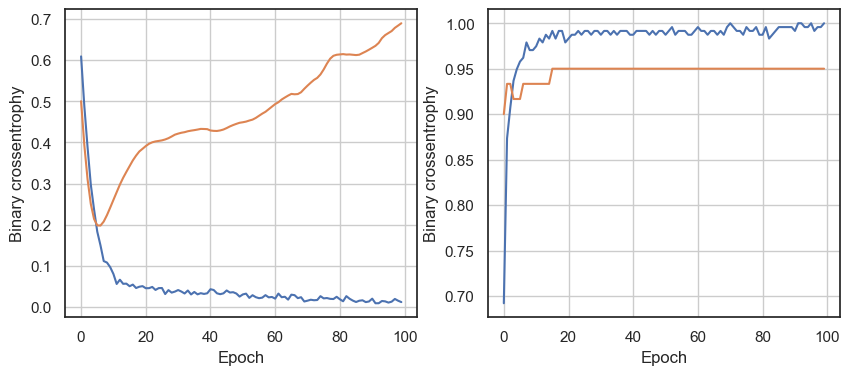

4/4 [==============================] - 0s 6ms/step - loss: 0.0431 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.001, batch size 32


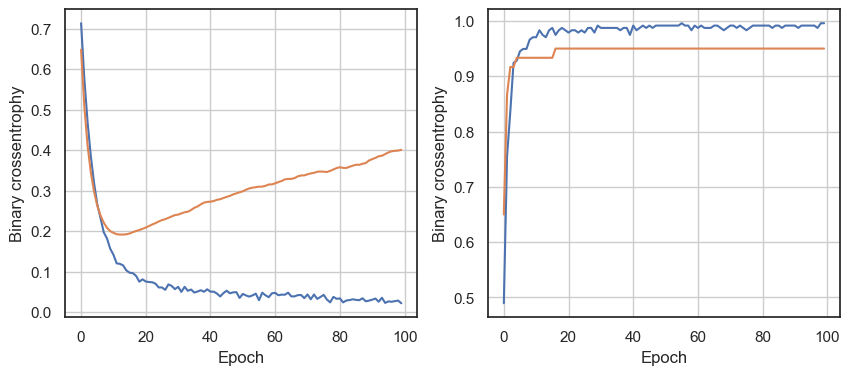

4/4 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.001, batch size 64


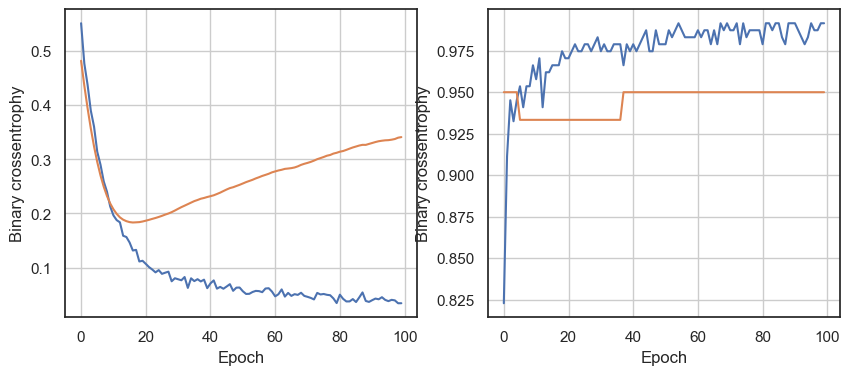

4/4 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9899
32 nodes, dropout 0.2, lr 0.001, batch size 128


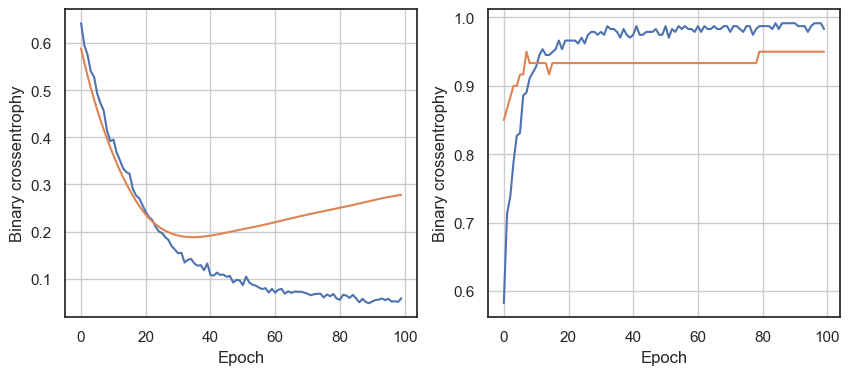

4/4 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.01, batch size 32


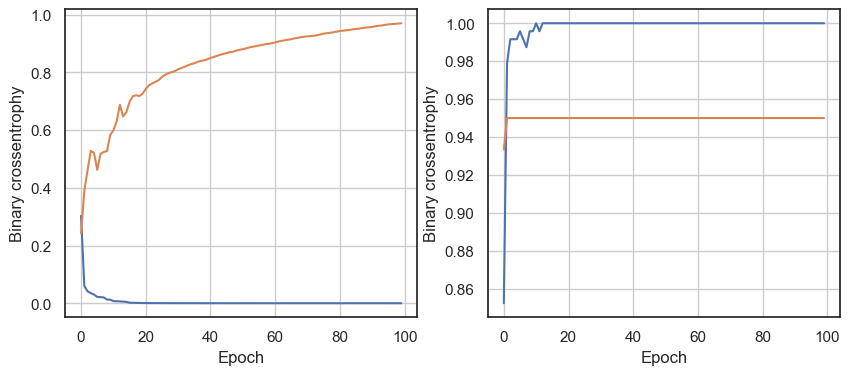

4/4 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.01, batch size 64


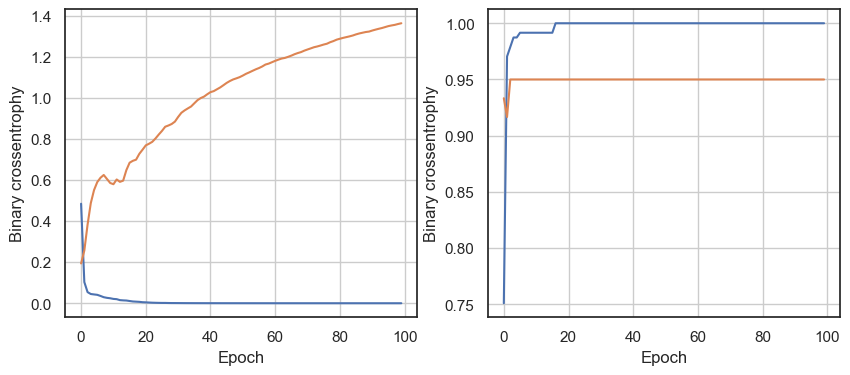

4/4 [==============================] - 0s 5ms/step - loss: 0.0986 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.01, batch size 128


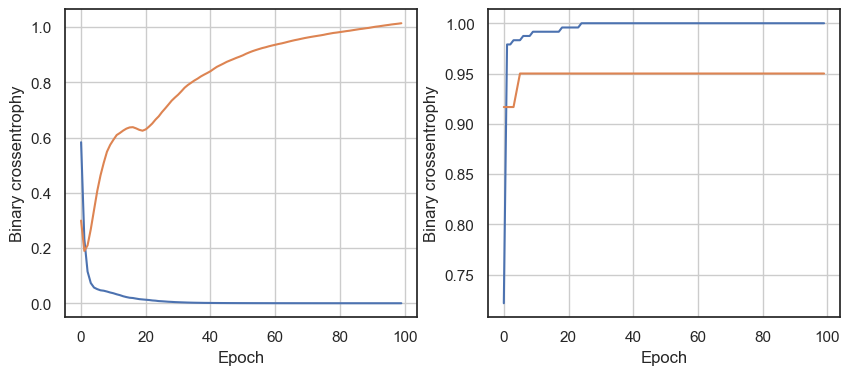

4/4 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.005, batch size 32


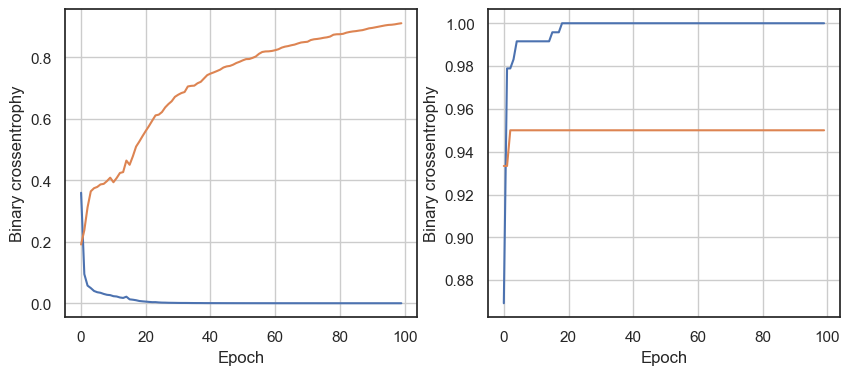

4/4 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.005, batch size 64


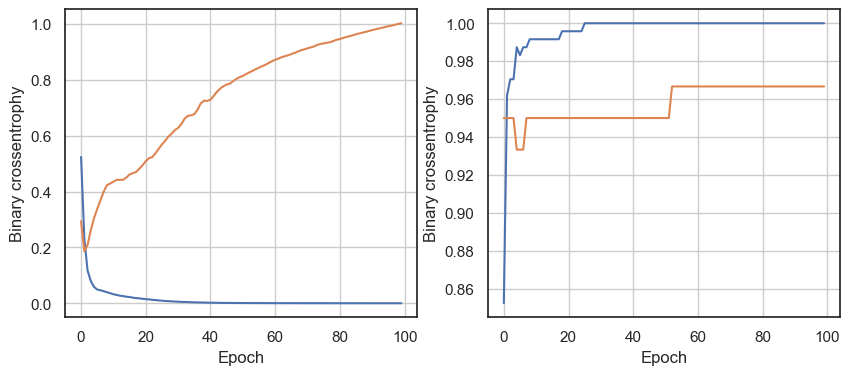

4/4 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.005, batch size 128


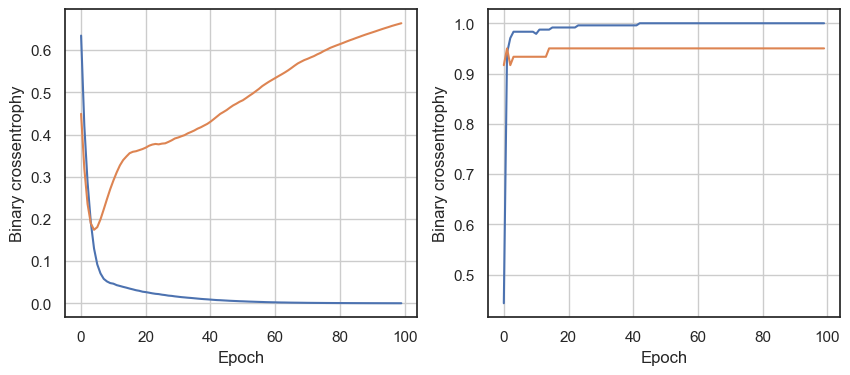

4/4 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.001, batch size 32


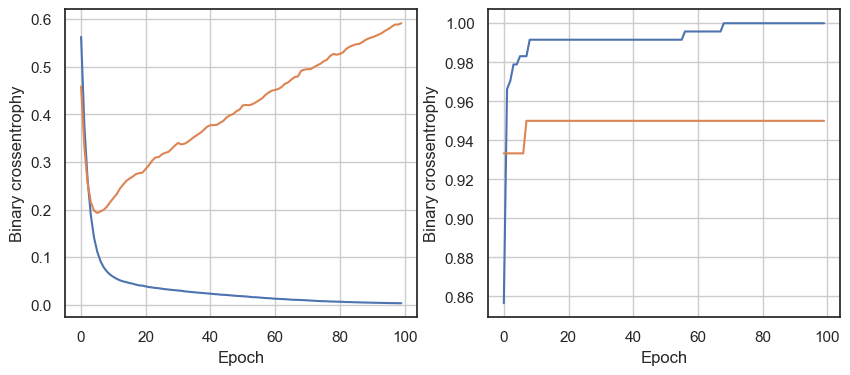

4/4 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.001, batch size 64


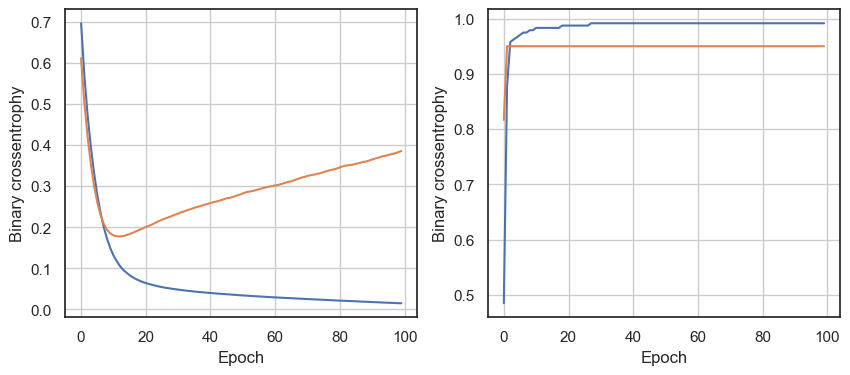

4/4 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9899
64 nodes, dropout 0, lr 0.001, batch size 128


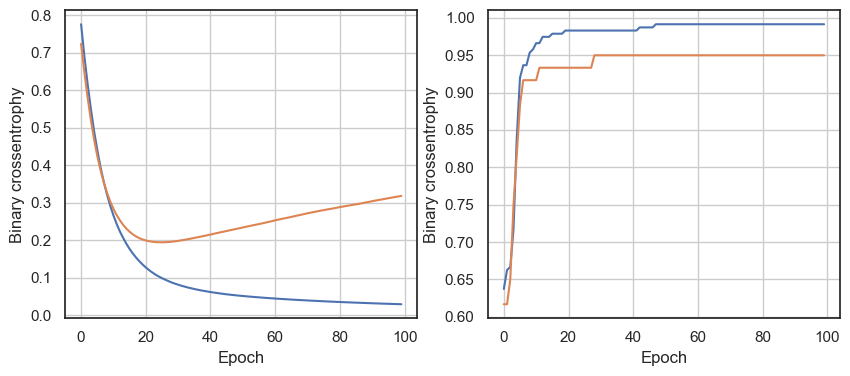

4/4 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.01, batch size 32


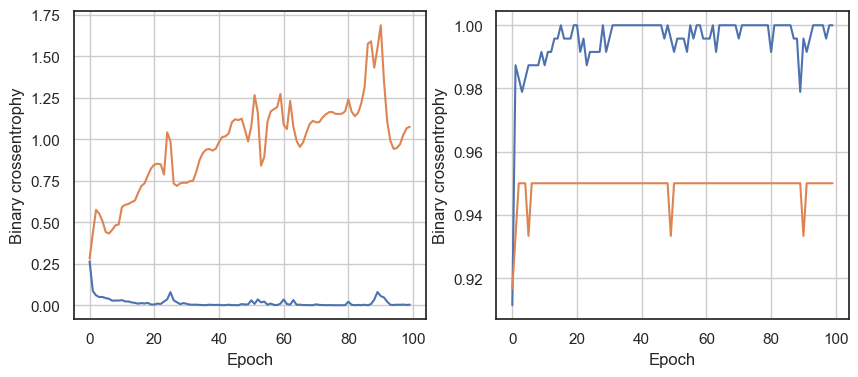

4/4 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.01, batch size 64


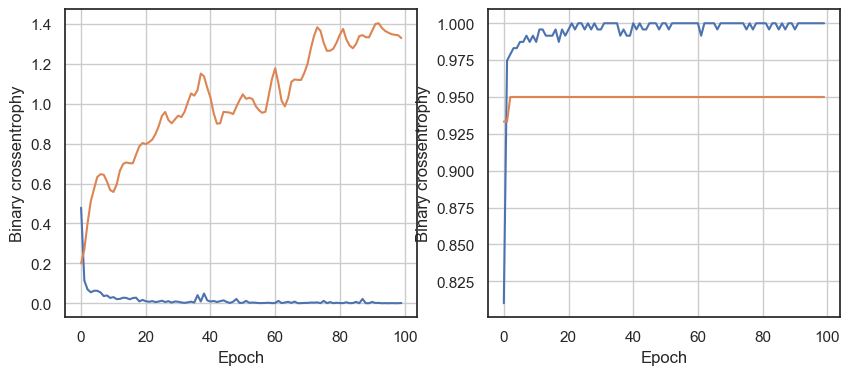

4/4 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.01, batch size 128


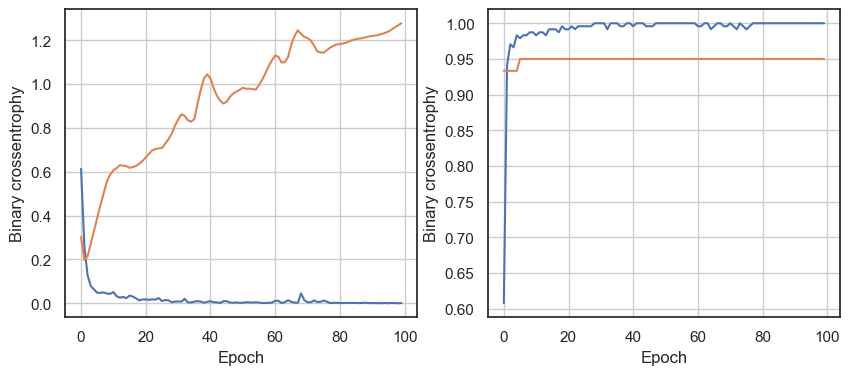

4/4 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.005, batch size 32


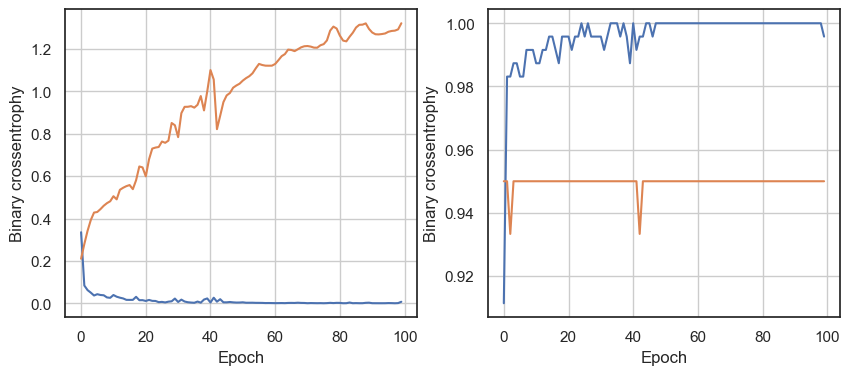

4/4 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.005, batch size 64


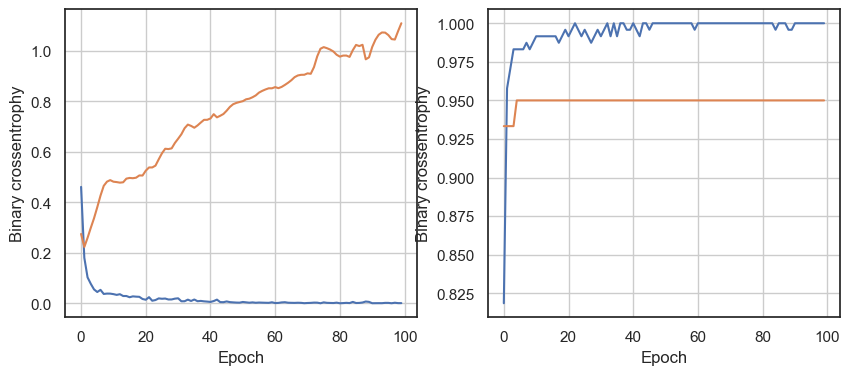

4/4 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.005, batch size 128


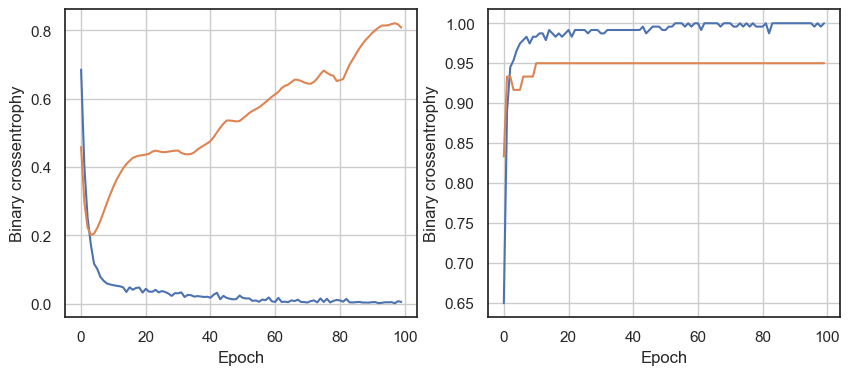

4/4 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.001, batch size 32


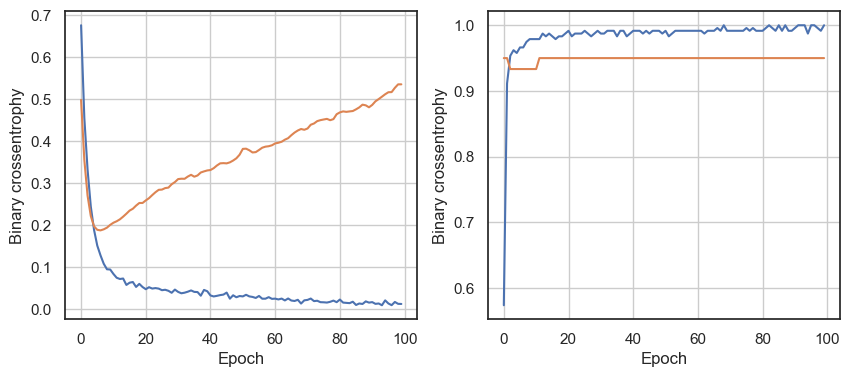

4/4 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.001, batch size 64


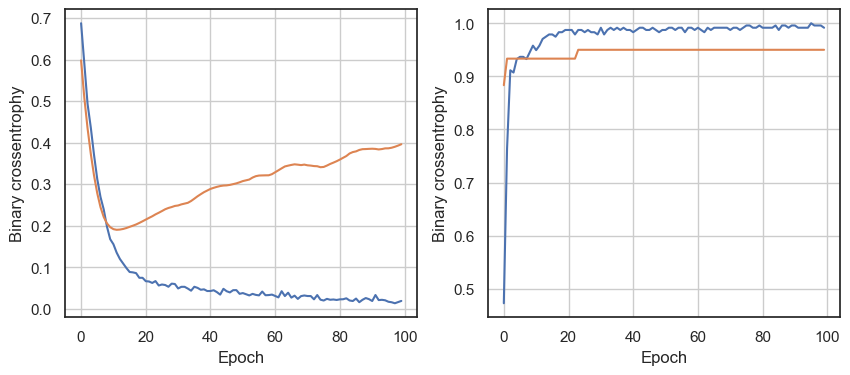

4/4 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9899
64 nodes, dropout 0.2, lr 0.001, batch size 128


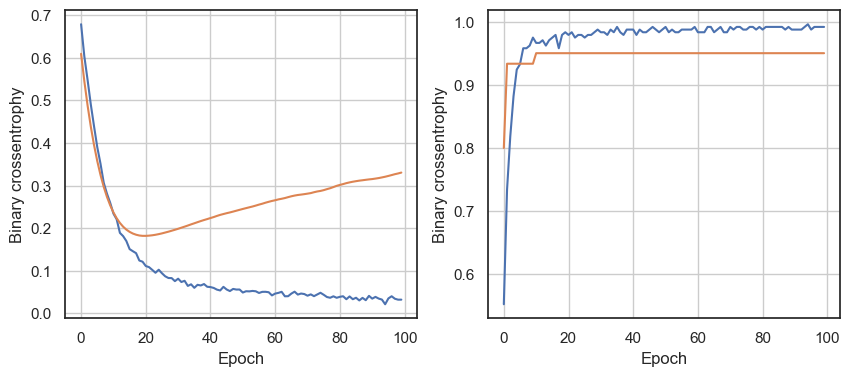

4/4 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9899


In [88]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_val, y_val)[0]
                if val_loss < least_val_loss:
                    least_value_loss=val_loss
                    least_loss_model=model

In [90]:
y_pred=least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 6ms/step


In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

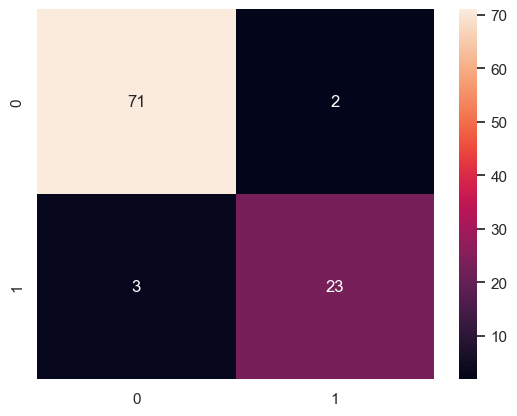

In [92]:
sns.heatmap(cm,annot=True)
plt.savefig('BC.png')

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.92      0.88      0.90        26

    accuracy                           0.95        99
   macro avg       0.94      0.93      0.93        99
weighted avg       0.95      0.95      0.95        99



Model had an accuracy of 95%

The model predicted 71 cases as Benign(0) accurately and 2 cases inaccurately as Malignant(1).

The model predicted 23 cases as Malignant(1) accurately and 3 case inaccurately as Benign(0).

**Conclusions**

The feature analysis show that there are few features with more predictive value for the diagnosis. The observations were confirmed by the Recursive Feature Elimination(RFE) and cross-validation, eliminating features that do not improve the efficiency of the predictive model. These features selected are 'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst'. We were able to predict with good accuracy of 95% the malignant and benign tumors based on the neural network model using tensorflow.